In [27]:
#Firstly, I import all the libraries what I need
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
# and after that, I create a function for this function my aim is to merge to fgImg and bgImg and fgImg should be in front of the BgImg.
def combineForegroundBackground(fgImg, fgMask, bgImg, topLeft):
    fgH, fgW = fgImg.shape[:2]
    bgH, bgW = bgImg.shape[:2]
    """In the above, my aim is to get the dimensions of the FgImg and BgImg """
    fgTop, fgLeft = topLeft
    """In the above,my aim is to get the location of the foreground image's top-left corner in the background image."""
    final = bgImg.copy()
    # create for-loop look all pixels in the foreground image and check the pixels if it belongs the fgMask determine the location in the background .
    for y in range(fgH):
        for x in range(fgW):
            if fgMask[y,x] > 0:
                backgroundX = fgLeft + x
                backgroundY = fgTop + y
                # check the foreground pixels is in the boundries of background image
                if backgroundX >= 0 and backgroundY >= 0 and backgroundX < bgW  and backgroundY < bgH:
                    # Copy the foreground image to the background image
                    final[backgroundY,backgroundX] = fgImg[y,x]

    return final



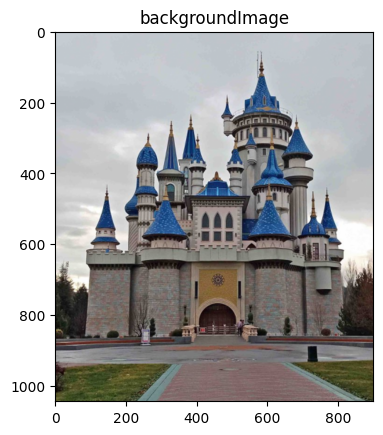

In [33]:
#the code reads dog, masked_dog and sazova_park image
fgImg = cv2.imread("dog.jpg")
fgMask = cv2.imread("masked_dog.png", cv2.IMREAD_GRAYSCALE)
bgImg = cv2.imread("sazova_park.png")
plt.title("backgroundImage")
plt.imshow(bgImg[:,:,::-1])
plt.show()


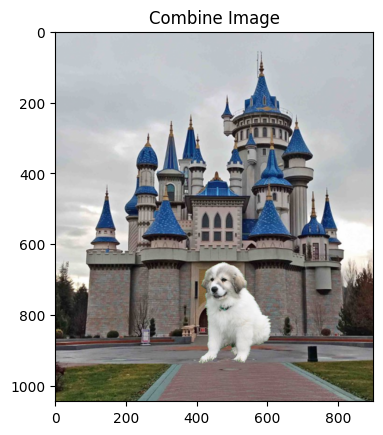

In [29]:
# Define the position of which the task wants and show it.
Middle =(608,302)
Left = (728, 279)
Right= (766, 656)
combineImg = combineForegroundBackground(fgImg, fgMask, bgImg, Middle)
plt.title("Combine Image")
plt.imshow(combineImg[:,:,::-1])# for this it shows original color
plt.show()



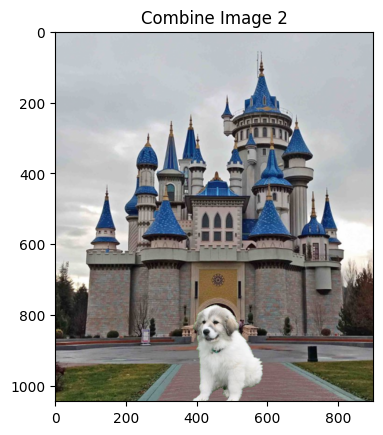

In [30]:
combineImg2 = combineForegroundBackground(fgImg, fgMask, bgImg, Left)
plt.title("Combine Image 2")
plt.imshow(combineImg2[:,:,::-1])
plt.show()

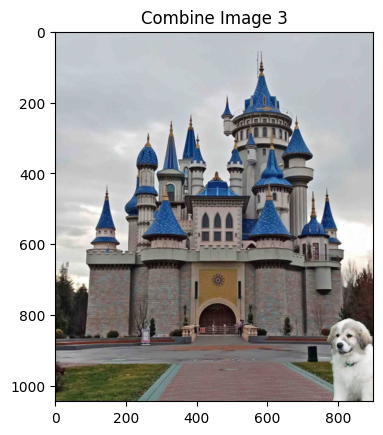

In [31]:
combinedImg3 = combineForegroundBackground(fgImg, fgMask, bgImg, Right)
plt.title("Combine Image 3")
plt.imshow(combinedImg3[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()
